<a href="https://colab.research.google.com/github/ai-veritas/ml-labs/blob/main/ML_P_1_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import urllib.request

# Set path in your Google Drive
gdrive_path = 'drive/MyDrive/student_data'
os.makedirs(gdrive_path, exist_ok=True)

# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'
zip_path = os.path.join(gdrive_path, 'student.zip')

# Download the dataset
urllib.request.urlretrieve(url, zip_path)

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(gdrive_path)

print("Dataset downloaded and extracted.")


Dataset downloaded and extracted.


In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [4]:
data = load_breast_cancer()

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = pd.Series(data.target)

In [9]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# Normalization required as the range of the columns don't match

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
slr = StandardScaler()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
X_train = slr.fit_transform(X_train)
X_test = slr.transform(X_test)
X_train = pd.DataFrame(X_train, columns=data.feature_names)
X_test = pd.DataFrame(X_test, columns=data.feature_names)

## Features

In [33]:
import numpy as np

In [52]:
import pandas as pd

def features_classification(X):

    stats_dict = {
        'Feature': [],
        'Mean': [],
        'Std': [],
        'Range': [],
        'Skewness': [],
        'Kurtosis': []}

    for column in X.columns:
        stats_dict['Feature'].append(column)
        stats_dict['Mean'].append(X[column].mean())
        stats_dict['Std'].append(X[column].std())
        stats_dict['Range'].append(X[column].max() - X[column].min())
        stats_dict['Skewness'].append(X[column].skew())
        stats_dict['Kurtosis'].append(X[column].kurtosis())
    stats_df = pd.DataFrame(stats_dict)

    return stats_df.T


In [53]:
features_classification(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
Feature,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Mean,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
Std,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101,1.001101
Range,5.781262,6.939174,5.786308,6.573349,7.964654,5.571539,5.376635,5.292181,6.821554,6.59281,9.763141,8.361427,10.257953,11.346933,9.633946,7.163772,12.332512,8.396442,6.563545,10.396726,5.693327,6.193014,5.900479,7.107679,6.385445,5.880828,5.985623,4.459479,8.04194,6.616456
Skewness,0.976412,0.758253,1.024996,1.72598,0.506081,1.086031,1.399824,1.176789,0.744173,1.397118,3.402149,1.732675,3.760507,5.845101,2.573178,1.96234,5.170263,1.613878,1.926922,4.046981,1.116316,0.488622,1.132614,1.905034,0.393583,1.338694,1.110318,0.514148,1.480387,1.313204
Kurtosis,0.982245,1.191987,1.123965,4.156637,1.171985,1.15717,2.084279,1.179628,1.152953,3.417739,20.285546,6.200997,24.102543,52.73312,12.301935,5.254521,46.801913,5.806743,5.060394,26.334225,1.024893,0.209799,1.138522,4.724686,0.296671,2.331727,1.466139,-0.505071,4.602224,2.279324


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

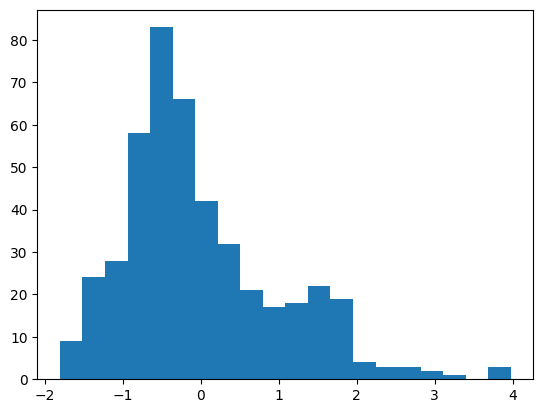

In [55]:
plt.hist(X_train['mean perimeter'], bins=20)
plt.show()